<a href="https://colab.research.google.com/github/valamuri2020/Cancer-Tumor-Classification/blob/main/TF_Cancer_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification (1).csv


In [ ]:
df = pd.read_csv("cancer_classification.csv")
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


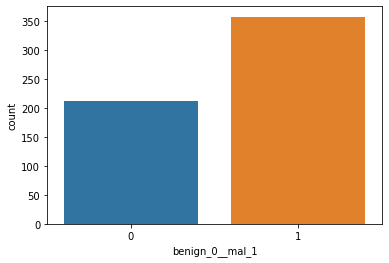

In [ ]:
sns.countplot(x='benign_0__mal_1', data=df)

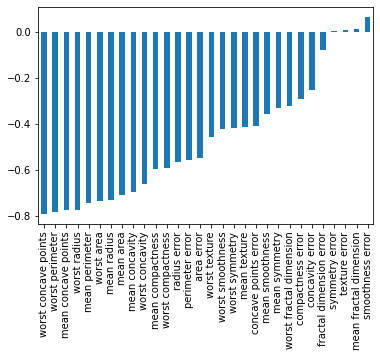

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

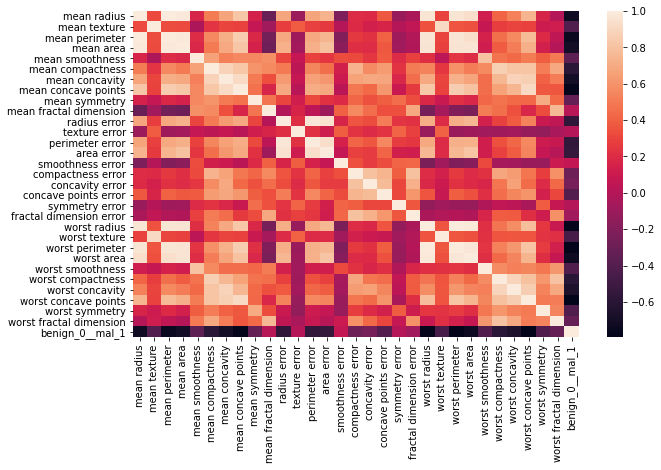

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6835 - val_loss: 0.6522
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6394 - val_loss: 0.6171
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6001 - val_loss: 0.5792
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5614 - val_loss: 0.5343
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5259 - val_loss: 0.4838
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4712 - val_loss: 0.4325
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4236 - val_loss: 0.3851
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3805 - val_loss: 0.3448
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3405 - val_loss: 0.3110
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3079 - val_loss: 0.2787
Epoch 11

In [ ]:
losses = pd.DataFrame(model.history.history)

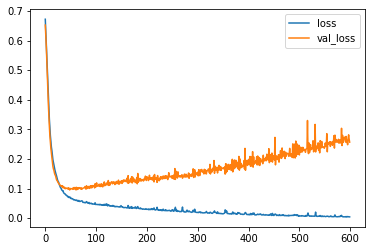

In [ ]:
losses.plot()

In [ ]:
# val_loss going up means that we're overfitting to the training dataset

In [ ]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25) # we want to minimize val_loss, patience is how many epochs we wait after seeing no improvement

In [ ]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6809 - val_loss: 0.6570
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6476 - val_loss: 0.6286
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6135 - val_loss: 0.5920
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5783 - val_loss: 0.5557
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5499 - val_loss: 0.5128
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4972 - val_loss: 0.4665
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4568 - val_loss: 0.4227
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4108 - val_loss: 0.3826
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3659 - val_loss: 0.3459
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3415 - val_loss: 0.3151
Epoch 11

In [ ]:
model_loss = pd.DataFrame(model.history.history)

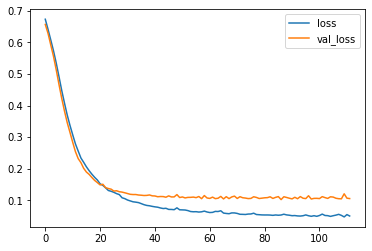

In [ ]:
model_loss.plot()

In [ ]:
# adding dropout layers

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) #how much of the neurons you want to turn off randomly

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5)) #how much of the neurons you want to turn off randomly

# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7115 - val_loss: 0.6949
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6945 - val_loss: 0.6897
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6794 - val_loss: 0.6825
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6713 - val_loss: 0.6720
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6426 - val_loss: 0.6531
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6234 - val_loss: 0.6048
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6258 - val_loss: 0.5689
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5749 - val_loss: 0.5336
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5471 - val_loss: 0.5037
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5468 - val_loss: 0.4678
Epoch 11

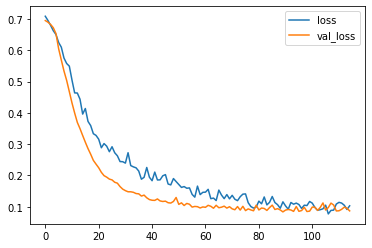

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.97      1.00      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
print(confusion_matrix(y_test, pred))

[[52  3]
 [ 0 88]]
